https://blog.csdn.net/juzihongle1/article/details/73135920

1.Recursive backtracker ( 递归回溯，也是深度优先算法）

2.Randomized Prim's algorithm（随机Prim算法，让我想起了最小生成树的Prim算法）

3.Recursive division （递归分割算法）

首先，为了方便后续处理，默认的迷宫元素表示为[x,y,w]：

1.我们的迷宫为常规的矩形，因此可以用二维表示一个迷宫单元, 每个迷宫单元表示为一个二维数组元素[x,y]。

3.每个迷宫单元包含左上右下四个属性, 用w表示，分别表示迷宫单元四个面的墙，墙不占据迷宫单元。

深度优先构建迷宫的思想就是，每次把新找到的未访问迷宫单元作为优先，寻找其相邻的未访问过的迷宫单元，直到所有的单元都被访问到。通俗的说，就是从起点开始随机走，走不通了就返回上一步，从下一个能走的地方再开始随机走。一般来说，深度优先法生成的迷宫极度扭曲，有着一条明显的主路。

In [1]:
%matplotlib inline

Rows: 20
Columns: 20


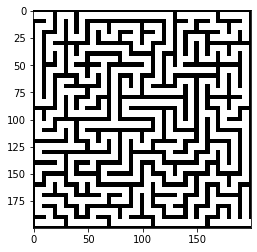

In [2]:
# Code by jollysoul
 
import random
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
 
num_rows = int(input("Rows: ")) # number of rows
num_cols = int(input("Columns: ")) # number of columns
 
# The array M is going to hold the array information for each cell.
# The first four coordinates tell if walls exist on those sides 
# and the fifth indicates if the cell has been visited in the search.
# M(LEFT, UP, RIGHT, DOWN, CHECK_IF_VISITED)
M = np.zeros((num_rows,num_cols,5), dtype=np.uint8)
 
# The array image is going to be the output image to display
image = np.zeros((num_rows*10,num_cols*10), dtype=np.uint8)
 
# Set starting row and column
r = 0
c = 0
history = [(r,c)] # The history is the stack of visited locations
 
# Trace a path though the cells of the maze and open walls along the path.
# We do this with a while loop, repeating the loop until there is no history, 
# which would mean we backtracked to the initial start.
while history: 
    M[r,c,4] = 1 # designate this location as visited
    # check if the adjacent cells are valid for moving to
    check = []
    if c > 0 and M[r,c-1,4] == 0:
        check.append('L')  
    if r > 0 and M[r-1,c,4] == 0:
        check.append('U')
    if c < num_cols-1 and M[r,c+1,4] == 0:
        check.append('R')
    if r < num_rows-1 and M[r+1,c,4] == 0:
        check.append('D')    
    
    if len(check): # If there is a valid cell to move to.
        # Mark the walls between cells as open if we move
        history.append([r,c])
        move_direction = random.choice(check)
        if move_direction == 'L':
            M[r,c,0] = 1
            c = c-1
            M[r,c,2] = 1
        if move_direction == 'U':
            M[r,c,1] = 1
            r = r-1
            M[r,c,3] = 1
        if move_direction == 'R':
            M[r,c,2] = 1
            c = c+1
            M[r,c,0] = 1
        if move_direction == 'D':
            M[r,c,3] = 1
            r = r+1
            M[r,c,1] = 1
    else: # If there are no valid cells to move to.
    # retrace one step back in history if no move is possible
        r,c = history.pop()
    
         
# Open the walls at the start and finish
M[0,0,0] = 1
M[num_rows-1,num_cols-1,2] = 1
    
# Generate the image for display
for row in range(0,num_rows):
    for col in range(0,num_cols):
        cell_data = M[row,col]
        for i in range(10*row+2,10*row+8):
            image[i,range(10*col+2,10*col+8)] = 255
        if cell_data[0] == 1: 
            image[range(10*row+2,10*row+8),10*col] = 255
            image[range(10*row+2,10*row+8),10*col+1] = 255
        if cell_data[1] == 1: 
            image[10*row,range(10*col+2,10*col+8)] = 255
            image[10*row+1,range(10*col+2,10*col+8)] = 255
        if cell_data[2] == 1: 
            image[range(10*row+2,10*row+8),10*col+9] = 255
            image[range(10*row+2,10*row+8),10*col+8] = 255
        if cell_data[3] == 1: 
            image[10*row+9,range(10*col+2,10*col+8)] = 255
            image[10*row+8,range(10*col+2,10*col+8)] = 255
        
 
# Display the image
plt.imshow(image, cmap = cm.Greys_r, interpolation='none')
plt.show()

我们可以维护一个迷宫单元格的列表，而不是边的列表。在这个迷宫单元格列表里面存放了未访问的单元格，我们在单元格列表中随机挑选一个单元格，如果这个单元格有多面墙联系着已存在的迷宫通路，我们就随机选择一面墙打通。这会比基于边的版本分支稍微多一点。

相对于深度优先的算法，Prim随机算法不是优先选择最近选中的单元格，而是随机的从所有的列表中的单元格进行选择，新加入的单元格和旧加入的单元格同样概率会被选择，新加入的单元格没有有优先权。因此其分支更多，生成的迷宫更复杂，难度更大，也更自然。

Rows: 20
Columns: 20


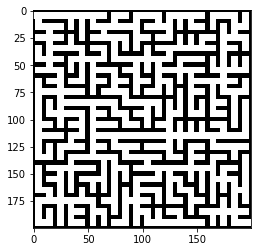

In [3]:
import random
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
 
num_rows = int(input("Rows: ")) # number of rows
num_cols = int(input("Columns: ")) # number of columns
 
# The array M is going to hold the array information for each cell.
# The first four coordinates tell if walls exist on those sides 
# and the fifth indicates if the cell has been visited in the search.
# M(LEFT, UP, RIGHT, DOWN, CHECK_IF_VISITED)
M = np.zeros((num_rows,num_cols,5), dtype=np.uint8)
 
# The array image is going to be the output image to display
image = np.zeros((num_rows*10,num_cols*10), dtype=np.uint8)
 
# Set starting row and column
r = 0
c = 0
history = [(r,c)] # The history is the stack of visited locations
 
# Trace a path though the cells of the maze and open walls along the path.
# We do this with a while loop, repeating the loop until there is no history, 
# which would mean we backtracked to the initial start.
while history: 
	#random choose a candidata cell from the cell set histroy
	r,c = random.choice(history)
	M[r,c,4] = 1 # designate this location as visited
	history.remove((r,c))
	check = []
	# If the randomly chosen cell has multiple edges 
    # that connect it to the existing maze, 
	if c > 0:
		if M[r,c-1,4] == 1:
			check.append('L')
		elif M[r,c-1,4] == 0:
			history.append((r,c-1))
			M[r,c-1,4] = 2
	if r > 0:
		if M[r-1,c,4] == 1: 
			check.append('U') 
		elif M[r-1,c,4] == 0:
			history.append((r-1,c))
			M[r-1,c,4] = 2
	if c < num_cols-1:
		if M[r,c+1,4] == 1: 
			check.append('R')
		elif M[r,c+1,4] == 0:
			history.append((r,c+1))
			M[r,c+1,4] = 2 
	if r < num_rows-1:
		if M[r+1,c,4] == 1: 
			check.append('D') 
		elif  M[r+1,c,4] == 0:
			history.append((r+1,c))
			M[r+1,c,4] = 2
 
    # select one of these edges at random.
	if len(check):
		move_direction = random.choice(check)
		if move_direction == 'L':
			M[r,c,0] = 1
			c = c-1
			M[r,c,2] = 1
		if move_direction == 'U':
			M[r,c,1] = 1
			r = r-1
			M[r,c,3] = 1
		if move_direction == 'R':
			M[r,c,2] = 1
			c = c+1
			M[r,c,0] = 1
		if move_direction == 'D':
			M[r,c,3] = 1
			r = r+1
			M[r,c,1] = 1
         
# Open the walls at the start and finish
M[0,0,0] = 1
M[num_rows-1,num_cols-1,2] = 1
    
# Generate the image for display
for row in range(0,num_rows):
    for col in range(0,num_cols):
        cell_data = M[row,col]
        for i in range(10*row+2,10*row+8):
            image[i,range(10*col+2,10*col+8)] = 255
        if cell_data[0] == 1: 
            image[range(10*row+2,10*row+8),10*col] = 255
            image[range(10*row+2,10*row+8),10*col+1] = 255
        if cell_data[1] == 1: 
            image[10*row,range(10*col+2,10*col+8)] = 255
            image[10*row+1,range(10*col+2,10*col+8)] = 255
        if cell_data[2] == 1: 
            image[range(10*row+2,10*row+8),10*col+9] = 255
            image[range(10*row+2,10*row+8),10*col+8] = 255
        if cell_data[3] == 1: 
            image[10*row+9,range(10*col+2,10*col+8)] = 255
            image[10*row+8,range(10*col+2,10*col+8)] = 255
        
 
# Display the image
plt.imshow(image, cmap = cm.Greys_r, interpolation='none')
plt.show()

递归分割法生成的迷宫较为简单，有点像四叉树，直路多且不扭曲。通俗的说，就是把空间用十字分成四个子空间，然后在三面墙上挖洞（为了确保连通），之后对每个子空间继续做这件事直到空间不足以继续分割为止。此算法十分高效。

Rows: 20
Columns: 20


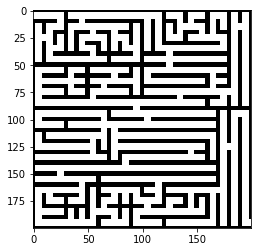

In [4]:
# Code by jollysoul
 
import random
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
 
#这个函数将当前区域划分为四个小区域，并随机的在三个区域挖洞，
#让四个区域彼此联通，分隔与挖洞点都是随机生成的。
def Recursive_division(r1, r2, c1, c2, M, image):
	if r1 < r2 and c1 < c2:
		rm = random.randint(r1, r2-1)
		cm = random.randint(c1, c2-1)
		cd1 = random.randint(c1,cm)
		cd2 = random.randint(cm+1,c2)
		rd1 = random.randint(r1,rm)
		rd2 = random.randint(rm+1,r2)
		d = random.randint(1,4)
		if d == 1:
			M[rd2, cm, 2] = 1
			M[rd2, cm+1, 0] = 1
			M[rm, cd1, 3] = 1
			M[rm+1, cd1, 1] = 1
			M[rm, cd2, 3] = 1
			M[rm+1, cd2, 1] = 1
		elif d == 2:
			M[rd1, cm, 2] = 1
			M[rd1, cm+1, 0] = 1
			M[rm, cd1, 3] = 1
			M[rm+1, cd1, 1] = 1
			M[rm, cd2, 3] = 1
			M[rm+1, cd2, 1] = 1
		elif d == 3:
			M[rd1, cm, 2] = 1
			M[rd1, cm+1, 0] = 1
			M[rd2, cm, 2] = 1
			M[rd2, cm+1, 0] = 1
			M[rm, cd2, 3] = 1
			M[rm+1, cd2, 1] = 1
		elif d == 4:
			M[rd1, cm, 2] = 1
			M[rd1, cm+1, 0] = 1
			M[rd2, cm, 2] = 1
			M[rd2, cm+1, 0] = 1
			M[rm, cd1, 3] = 1
			M[rm+1, cd1, 1] = 1
 
		Recursive_division(r1, rm, c1, cm, M, image)
		Recursive_division(r1, rm, cm+1, c2, M, image)
		Recursive_division(rm+1, r2, cm+1, c2, M, image)
		Recursive_division(rm+1, r2, c1, cm, M, image)
 
	elif r1 < r2:
		rm = random.randint(r1, r2-1)
		M[rm,c1,3] = 1
		M[rm+1,c1,1] = 1
		Recursive_division(r1, rm, c1, c1, M, image)
		Recursive_division(rm+1, r2, c1, c1, M, image)
	elif c1 < c2:
		cm = random.randint(c1,c2-1)
		M[r1,cm,2] = 1
		M[r1,cm+1,0] = 1
		Recursive_division(r1, r1, c1, cm, M, image)
		Recursive_division(r1, r1, cm+1, c2, M, image)
 
 
num_rows = int(input("Rows: ")) # number of rows
num_cols = int(input("Columns: ")) # number of columns
r1 = 0
r2 = num_rows-1
c1 = 0
c2 = num_cols-1
 
# The array M is going to hold the array information for each cell.
# The first four coordinates tell if walls exist on those sides 
# and the fifth indicates if the cell has been visited in the search.
# M(LEFT, UP, RIGHT, DOWN, CHECK_IF_VISITED)
M = np.zeros((num_rows,num_cols,5), dtype=np.uint8)
 
# The array image is going to be the output image to display
image = np.zeros((num_rows*10,num_cols*10), dtype=np.uint8)
 
Recursive_division(r1, r2, c1, c2, M, image)  
 
# Open the walls at the start and finish
M[0,0,0] = 1
M[num_rows-1,num_cols-1,2] = 1
    
# Generate the image for display
for row in range(0,num_rows):
    for col in range(0,num_cols):
        cell_data = M[row,col]
        for i in range(10*row+2,10*row+8):
            image[i,range(10*col+2,10*col+8)] = 255
        if cell_data[0] == 1: 
            image[range(10*row+2,10*row+8),10*col] = 255
            image[range(10*row+2,10*row+8),10*col+1] = 255
        if cell_data[1] == 1: 
            image[10*row,range(10*col+2,10*col+8)] = 255
            image[10*row+1,range(10*col+2,10*col+8)] = 255
        if cell_data[2] == 1: 
            image[range(10*row+2,10*row+8),10*col+9] = 255
            image[range(10*row+2,10*row+8),10*col+8] = 255
        if cell_data[3] == 1: 
            image[10*row+9,range(10*col+2,10*col+8)] = 255
            image[10*row+8,range(10*col+2,10*col+8)] = 255
        
 
# Display the image
plt.imshow(image, cmap = cm.Greys_r, interpolation='none')
plt.show()